<a href="https://colab.research.google.com/github/aakarshsurendra/road_nlp/blob/main/ROAD_NLP_Common.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A - Importing and Filtering the News

In [ ]:
import pandas as pd
df = pd.read_csv('data_road.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data_road.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset_1000 = df.head(1000)

Clustering - To remove the unrelated news

In [ ]:
import spacy

# Load English tokenizer, tagger, parser, and NER
nlp = spacy.load("en_core_web_sm")

# Function to preprocess text using SpaCy
def preprocess_text_spacy(text):
    # Tokenize text and remove stopwords, punctuation, and lemmatize tokens
    doc = nlp(text)
    processed_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return processed_tokens

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data (list of article texts)
article_texts = dataset_1000.content

# Handling NaN values by replacing them with empty strings
article_texts_cleaned = article_texts.fillna('')

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=preprocess_text_spacy)

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(article_texts_cleaned)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#Model 1
from sklearn.cluster import KMeans

# Initialize K-means clustering
num_clusters = 3  # You can adjust this based on the number of desired clusters
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, random_state=42)

# Fit the clustering model
kmeans.fit(tfidf_matrix)

# Get the cluster labels
cluster_labels = kmeans.labels_

In [ ]:
#Model 2
from sklearn.cluster import KMeans

# Initialize K-means clustering
num_clusters = 3  # You can adjust this based on the number of desired clusters
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=25, random_state=42)

# Fit the clustering model
kmeans.fit(tfidf_matrix)

# Get the cluster labels
cluster_labels = kmeans.labels_

PCA

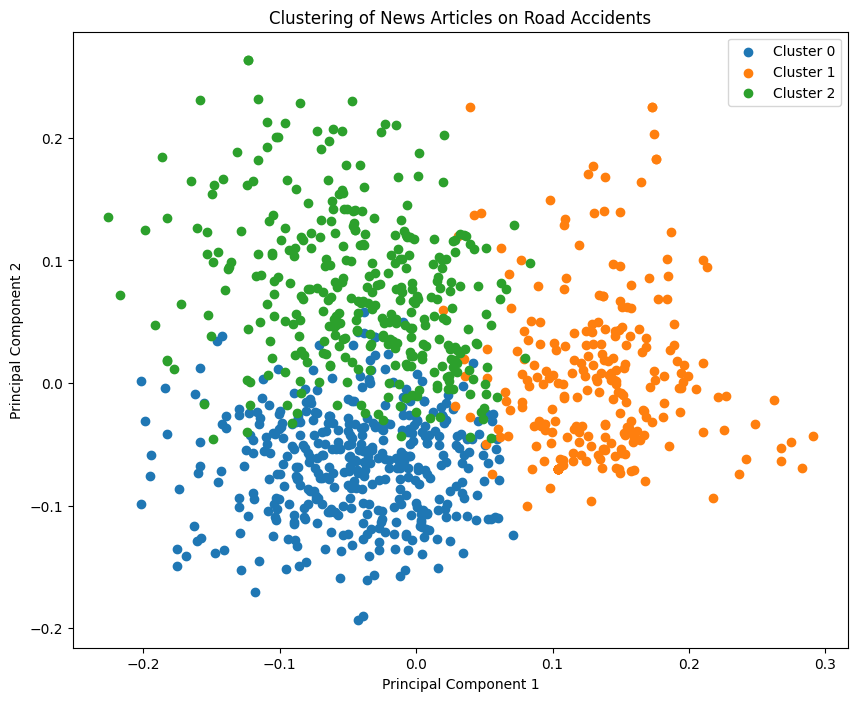

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 dimensions using PCA
pca = PCA(n_components=2)
tfidf_matrix_2d = pca.fit_transform(tfidf_matrix.toarray())

# Visualize clusters
plt.figure(figsize=(10, 8))
for cluster_label in range(num_clusters):
    plt.scatter(tfidf_matrix_2d[cluster_labels == cluster_label, 0],
                tfidf_matrix_2d[cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}')
plt.title('Clustering of News Articles on Road Accidents')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


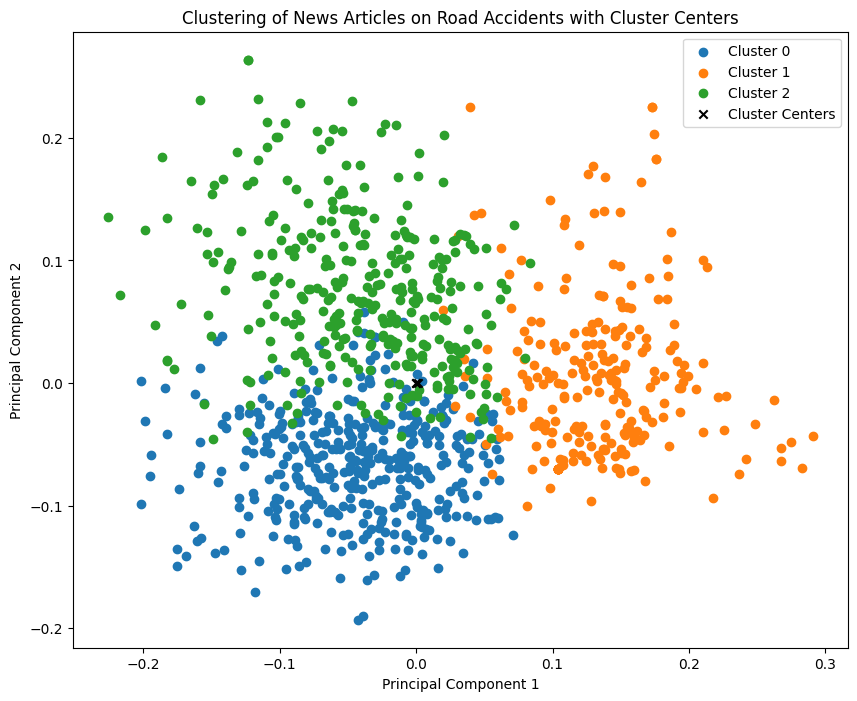

In [ ]:
import numpy as np

# Get cluster centers from K-means model
cluster_centers = kmeans.cluster_centers_

# Visualize clusters with cluster centers
plt.figure(figsize=(10, 8))
for cluster_label in range(num_clusters):
    plt.scatter(tfidf_matrix_2d[cluster_labels == cluster_label, 0],
                tfidf_matrix_2d[cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='x', color='black', label='Cluster Centers')
plt.title('Clustering of News Articles on Road Accidents with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


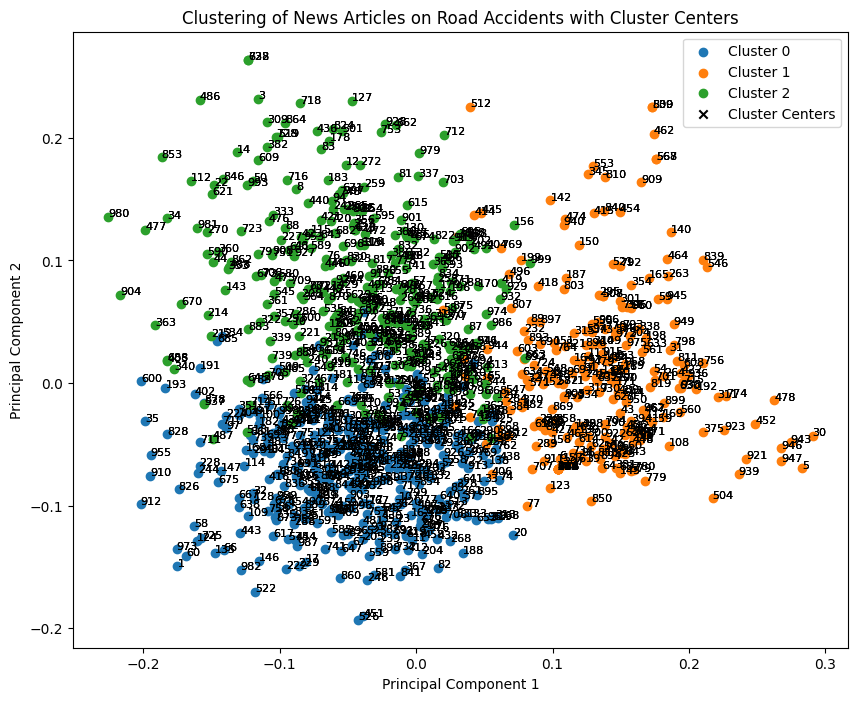

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get cluster centers from K-means model
cluster_centers = kmeans.cluster_centers_

# Visualize clusters with cluster centers
plt.figure(figsize=(10, 8))
for cluster_label in range(num_clusters):
    plt.scatter(tfidf_matrix_2d[cluster_labels == cluster_label, 0],
                tfidf_matrix_2d[cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}')
    # Add labels to each point
    for i in range(len(tfidf_matrix_2d)):
        plt.text(tfidf_matrix_2d[i, 0], tfidf_matrix_2d[i, 1], str(i), fontsize=8)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='x', color='black', label='Cluster Centers')
plt.title('Clustering of News Articles on Road Accidents with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Cluster Extraction, Model Difference and Extracting the Unwanted News Dataset

In [ ]:
Model1_cluster_0_points = [i for i in range(len(tfidf_matrix_2d)) if cluster_labels[i] == 0]
Model1_cluster_1_points = [i for i in range(len(tfidf_matrix_2d)) if cluster_labels[i] == 1]
Model1_cluster_2_points = [i for i in range(len(tfidf_matrix_2d)) if cluster_labels[i] == 2]

print("Cluster 0 points:", Model1_cluster_0_points)
print("Cluster 1 points:", Model1_cluster_1_points)
print("Cluster 2 points:", Model1_cluster_2_points)

Cluster 0 points: [0, 1, 2, 4, 7, 9, 11, 15, 16, 17, 18, 19, 20, 23, 24, 25, 27, 28, 29, 32, 33, 35, 36, 37, 38, 40, 41, 45, 49, 51, 52, 56, 58, 60, 61, 63, 66, 67, 68, 69, 71, 74, 75, 82, 85, 90, 93, 97, 99, 100, 101, 104, 107, 109, 114, 121, 124, 125, 128, 131, 132, 133, 135, 138, 146, 147, 154, 162, 166, 167, 168, 172, 173, 175, 176, 177, 180, 181, 182, 186, 188, 191, 193, 194, 195, 201, 203, 204, 205, 211, 218, 219, 222, 223, 224, 225, 228, 229, 231, 233, 234, 235, 238, 239, 241, 244, 246, 247, 249, 251, 252, 255, 261, 266, 267, 268, 271, 275, 276, 277, 278, 279, 283, 285, 288, 290, 291, 292, 293, 294, 296, 298, 299, 303, 306, 307, 308, 313, 314, 318, 319, 321, 326, 328, 329, 330, 331, 332, 335, 349, 350, 351, 352, 355, 358, 359, 367, 371, 378, 379, 387, 390, 391, 392, 393, 396, 399, 401, 402, 403, 407, 409, 412, 413, 416, 420, 430, 431, 432, 438, 441, 442, 443, 444, 447, 450, 451, 455, 458, 461, 468, 469, 470, 481, 483, 485, 489, 493, 495, 497, 498, 503, 509, 510, 511, 513, 514, 5

In [ ]:
Model2_cluster_0_points = [i for i in range(len(tfidf_matrix_2d)) if cluster_labels[i] == 0]
Model2_cluster_1_points = [i for i in range(len(tfidf_matrix_2d)) if cluster_labels[i] == 1]
Model2_cluster_2_points = [i for i in range(len(tfidf_matrix_2d)) if cluster_labels[i] == 2]

print("Cluster 0 points:", Model2_cluster_0_points)
print("Cluster 1 points:", Model2_cluster_1_points)
print("Cluster 2 points:", Model2_cluster_2_points)

Cluster 0 points: [0, 1, 2, 7, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 32, 34, 35, 36, 37, 38, 40, 41, 44, 45, 46, 49, 50, 52, 53, 56, 58, 60, 61, 63, 66, 67, 68, 69, 71, 72, 73, 75, 79, 82, 85, 88, 90, 93, 94, 97, 99, 100, 101, 104, 106, 107, 109, 110, 112, 114, 115, 118, 120, 121, 124, 125, 128, 131, 132, 133, 135, 143, 144, 146, 147, 154, 155, 162, 167, 168, 172, 173, 175, 176, 177, 180, 181, 182, 186, 188, 191, 193, 195, 201, 204, 205, 206, 208, 210, 211, 212, 214, 215, 218, 219, 221, 222, 223, 224, 227, 228, 229, 230, 233, 234, 235, 236, 238, 239, 240, 241, 244, 246, 247, 249, 250, 251, 252, 255, 262, 265, 267, 268, 270, 271, 274, 275, 276, 277, 278, 279, 283, 285, 286, 288, 293, 294, 296, 297, 298, 299, 302, 303, 306, 307, 308, 309, 313, 314, 318, 319, 322, 323, 324, 326, 328, 329, 330, 332, 333, 335, 339, 340, 350, 351, 352, 353, 355, 357, 358, 359, 360, 361, 363, 364, 367, 371, 376, 378, 379, 383, 385, 387, 390, 391, 392, 393, 396, 399, 401, 402, 403,

In [ ]:
set_Model1 = set(Model1_cluster_1_points)
set_Model2 = set(Model2_cluster_2_points)

# Find the elements that are in Model1_cluster_1_points but not in Model2_cluster_2_points
difference_Model1_Model2 = list(set_Model1.difference(set_Model2))

# Find the elements that are in Model2_cluster_2_points but not in Model1_cluster_1_points
difference_Model2_Model1 = list(set_Model2.difference(set_Model1))

print("Difference between Model1_cluster_1_points and Model2_cluster_2_points:", difference_Model1_Model2)
print("Difference between Model2_cluster_2_points and Model1_cluster_1_points:", difference_Model2_Model1)

Difference between Model1_cluster_1_points and Model2_cluster_2_points: [512, 516, 6, 521, 21, 536, 539, 31, 544, 546, 547, 548, 550, 39, 553, 42, 43, 555, 557, 48, 560, 561, 54, 55, 567, 568, 59, 571, 572, 62, 64, 65, 576, 579, 582, 587, 77, 594, 86, 89, 91, 92, 603, 95, 96, 608, 102, 614, 105, 108, 620, 111, 627, 117, 630, 119, 633, 634, 123, 637, 643, 134, 136, 137, 650, 139, 140, 142, 145, 148, 149, 150, 151, 152, 660, 664, 668, 157, 158, 159, 160, 161, 163, 164, 165, 678, 169, 171, 174, 687, 690, 697, 187, 701, 190, 192, 704, 707, 198, 199, 200, 715, 207, 719, 209, 724, 213, 217, 729, 220, 734, 742, 232, 243, 755, 245, 756, 764, 254, 768, 769, 258, 770, 771, 774, 263, 264, 776, 779, 780, 785, 792, 793, 284, 797, 800, 289, 803, 295, 807, 810, 811, 300, 301, 812, 304, 305, 819, 821, 310, 311, 825, 315, 827, 317, 327, 839, 840, 334, 847, 338, 850, 342, 856, 345, 346, 858, 348, 859, 354, 869, 370, 372, 373, 375, 890, 380, 381, 892, 893, 384, 894, 896, 897, 905, 394, 395, 906, 909, 398

In [ ]:
print(sorted(Model1_cluster_1_points))
print(len(difference_Model1_Model2))
print(len(difference_Model2_Model1))

[5, 6, 21, 30, 31, 39, 42, 43, 48, 54, 55, 59, 62, 64, 65, 77, 86, 89, 91, 92, 95, 96, 102, 105, 108, 111, 117, 119, 123, 134, 136, 137, 139, 140, 142, 145, 148, 149, 150, 151, 152, 157, 158, 159, 160, 161, 163, 164, 165, 169, 171, 174, 187, 190, 192, 198, 199, 200, 207, 209, 213, 217, 220, 232, 243, 245, 254, 258, 263, 264, 284, 289, 295, 300, 301, 304, 305, 310, 311, 315, 317, 327, 334, 338, 342, 345, 346, 348, 354, 370, 372, 373, 375, 380, 381, 384, 394, 395, 398, 406, 414, 415, 418, 422, 424, 425, 427, 435, 439, 448, 452, 453, 454, 456, 459, 462, 463, 464, 467, 471, 474, 478, 479, 482, 496, 504, 506, 507, 508, 512, 516, 521, 536, 539, 544, 546, 547, 548, 550, 553, 555, 557, 560, 561, 567, 568, 571, 572, 576, 579, 582, 587, 594, 603, 608, 614, 620, 627, 630, 633, 634, 637, 643, 650, 660, 664, 668, 678, 687, 690, 697, 701, 704, 707, 715, 719, 724, 729, 734, 742, 755, 756, 764, 768, 769, 770, 771, 774, 776, 779, 780, 785, 792, 793, 797, 798, 800, 803, 807, 809, 810, 811, 812, 819, 821

In [ ]:
len(Model1_cluster_1_points)

247

In [ ]:
import random
random_10_elements = random.sample(Model1_cluster_1_points, k=10)
print(random_10_elements)

[807, 637, 504, 137, 136, 576, 911, 546, 102, 478]


Verifying the unwanted news

In [ ]:
import random

for index in random_10_elements:
    news_article = dataset_1000.loc[index, 'content']
    print(f"News Article {index}:\n{news_article}\n")

Remove the unwanted News

In [ ]:
filtered_dataset_1000 = dataset_1000.drop(Model1_cluster_1_points)

# Reset the index of the new DataFrame
filtered_dataset_1000.reset_index(drop=True, inplace=True)

In [ ]:
filtered_dataset_1000.to_csv('Filtered_News_A.csv')

### B - Extracting each Sent

In [ ]:
df = pd.read_csv('Filtered_News_A.csv')

In [ ]:
import spacy
def One_Liners(dataset):
    nlp = spacy.load("en_core_web_sm")
    extracted_text = []

    for content in dataset['content']:
        doc = nlp(content)
        lines = content.split('\n')
        found = False
        for line in lines:
            if ":" in line:
                first_line_after_colon = line.split(":", 1)[1].strip()
                text_till_period = first_line_after_colon.split(".")[0]
                extracted_text.append(text_till_period)
                found = True
                break

        if not found:
            # Take the first row if no colon is found
            extracted_text.append(content.split(".")[0])

    # Append the extracted text to the dataset with a new column named "First Line"
    dataset['First_Line'] = extracted_text

In [ ]:
One_Liners(df)

### C - Pre-Processing

Pre-Processing

In [ ]:
sentence = df.First_Line

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Link,content,News_date,First Line,First_Line
0,0,0,https://timesofindia.indiatimes.com/city/allah...,SULTANPUR : Three people lost their lives on F...,"Updated: Feb 23, 2024, 13:51 IST",Three people lost their lives on Friday in a c...,Three people lost their lives on Friday in a c...
1,1,1,https://timesofindia.indiatimes.com/city/jaipu...,JAIPUR: Three people died in a car accident in...,"Updated: Feb 19, 2024, 15:48 IST",Three people died in a car accident in Rajasth...,Three people died in a car accident in Rajasth...
2,2,2,https://timesofindia.indiatimes.com/city/benga...,RAICHUR: Two women killed and five others were...,"Updated: Feb 18, 2024, 11:34 IST",Two women killed and five others were seriousl...,Two women killed and five others were seriousl...
3,3,3,https://timesofindia.indiatimes.com/city/delhi...,New Delhi: Two students were injured after a s...,"Feb 16, 2024, 08:12 IST",Two students were injured after a speeding car...,Two students were injured after a speeding car...
4,4,4,https://timesofindia.indiatimes.com/city/hyder...,"Hyderabad: A newlywed software engineer , his ...","Feb 22, 2024, 08:22 IST","A newlywed software engineer , his father-in-l...","A newlywed software engineer , his father-in-l..."


In [ ]:
import nltk
import spacy
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

nlp = spacy.load("en_core_web_sm")

def preprocess(sentence):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(sentence.lower())

    # Lemmatize each word using spaCy
    lemmatized_tokens = []
    for token in nlp(sentence):
        if token.text.isalnum() and token.text not in stop_words:
            lemmatized_tokens.append(token.lemma_)

    sentence_p = " ".join(lemmatized_tokens)
    return sentence_p

df['first_line_l'] = df['First_Line'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Link,content,News_date,First Line,First_Line,first_line_l
0,0,0,https://timesofindia.indiatimes.com/city/allah...,SULTANPUR : Three people lost their lives on F...,"Updated: Feb 23, 2024, 13:51 IST",Three people lost their lives on Friday in a c...,Three people lost their lives on Friday in a c...,three people lose life Friday car accident Pur...
1,1,1,https://timesofindia.indiatimes.com/city/jaipu...,JAIPUR: Three people died in a car accident in...,"Updated: Feb 19, 2024, 15:48 IST",Three people died in a car accident in Rajasth...,Three people died in a car accident in Rajasth...,three people die car accident Rajasthan Anupga...


### D

In [ ]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import gensim.downloader as api
import nltk
import pandas as pd
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Define function to get word vectors
def get_word_vectors(sentence, model):
    processed_sentence = preprocess(sentence)
    word_vectors = []
    for word in processed_sentence:
        if word in model:
            word_vector = model[word]
            word_vectors.append(word_vector)
    return word_vectors

# Define function to get sentence vector
def get_sent_vectors(sentence, model):
    word_vectors = get_word_vectors(sentence, model)
    if len(word_vectors) > 0:
        sentence_vector_mean = np.mean(word_vectors, axis=0)
        return sentence_vector_mean
    else:
        return None

In [ ]:
df['first_line_v'] = df['first_line_l'].apply(get_sent_vectors, model=model)

In [ ]:
df.head(3)

,Unnamed: 0.1,Unnamed: 0,Link,content,News_date,First Line,First_Line,first_line_l,first_line_v
0,0,0,https://timesofindia.indiatimes.com/city/allah...,SULTANPUR : Three people lost their lives on F...,"Updated: Feb 23, 2024, 13:51 IST",Three people lost their lives on Friday in a c...,Three people lost their lives on Friday in a c...,three people lose life Friday car accident Pur...,"[-0.1507108, 0.124925956, 0.0069990316, 0.1357..."
1,1,1,https://timesofindia.indiatimes.com/city/jaipu...,JAIPUR: Three people died in a car accident in...,"Updated: Feb 19, 2024, 15:48 IST",Three people died in a car accident in Rajasth...,Three people died in a car accident in Rajasth...,three people die car accident Rajasthan Anupga...,"[-0.17868602, 0.12452791, -0.020058146, 0.1550..."
2,2,2,https://timesofindia.indiatimes.com/city/benga...,RAICHUR: Two women killed and five others were...,"Updated: Feb 18, 2024, 11:34 IST",Two women killed and five others were seriousl...,Two women killed and five others were seriousl...,two woman kill five other seriously hurt car b...,"[-0.17456767, 0.09361267, 0.019272868, 0.11790..."
